In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quntity_sum_sorted_by_date_complete.csv')

In [3]:
unique_dates = df[[
    'transaction_date']].drop_duplicates().values
# Split the dates into 80:20 train and test sets
train_dates, test_dates = train_test_split(
    unique_dates, test_size=0.2, shuffle=False)

In [4]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\Panamgama\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,651 (41.61 KB)

 Trainable params: 10,651 (41.61 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Initialize an empty list to store the loss values
losses = []

# For each date in the training set
for date in train_dates:
    # Get the "transaction_qty" and "day_of_week" columns
    records = df[(df['transaction_date'] == date[0])][['transaction_qty', 'day_of_week']]

    # Reshape the data into a (n, 2) array
    data = records.values.reshape((records.shape[0], 1, 2))

    # Get the "transaction_qty" of the next day
    next_day_index = np.where(unique_dates == date)[0][0] + 1
    if next_day_index < len(unique_dates):
        next_day_date = unique_dates[next_day_index][0]
        next_day_record = df[(df['transaction_date'] == next_day_date)]['transaction_qty']
        target = next_day_record.values

        # Feed the data into the LSTM model and get the history
        history = model.fit(data, target, epochs=5, verbose=0)

        # Append the loss to the losses list
        losses.append(history.history['loss'][0])

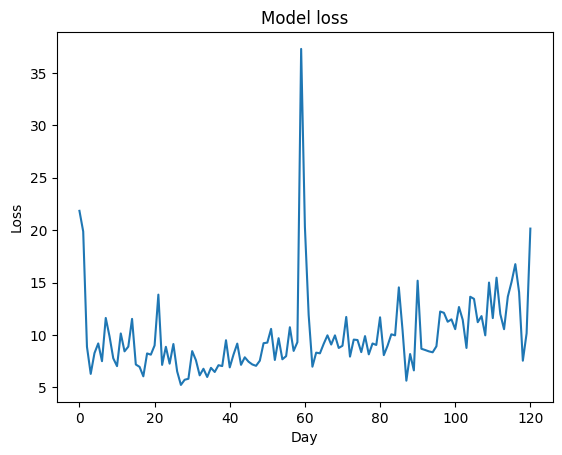

In [6]:
# Plot the losses
plt.plot(losses)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Day')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# Initialize a list to store the predictions
predictions = []

# For each date in the test set
for date in test_dates:
    # Get the "transaction_qty" and "day_of_week" columns
    records = df[(df['transaction_date'] == date[0])][['transaction_qty', 'day_of_week']]

    # Reshape the data into a (n, 2) array
    data = records.values.reshape((records.shape[0], 1, 2))

    # Use the LSTM model to predict the "transaction_qty" of the next day
    prediction = model.predict(data)

    # Append the prediction to the list
    predictions.append(prediction)

# Convert the list of predictions to a numpy array
predictions = np.array(predictions)

# Get the actual "transaction_qty" values of the next day for the test dates
actuals = []
for date in test_dates:
    next_day_index = np.where(unique_dates == date)[0][0] + 1
    if next_day_index < len(unique_dates):
        next_day_date = unique_dates[next_day_index][0]
        next_day_record = df[(
            df['transaction_date'] == next_day_date)]['transaction_qty']
        actual = next_day_record.values
        actuals.append(actual)
actuals = np.array(actuals)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
9/9 ━━━━

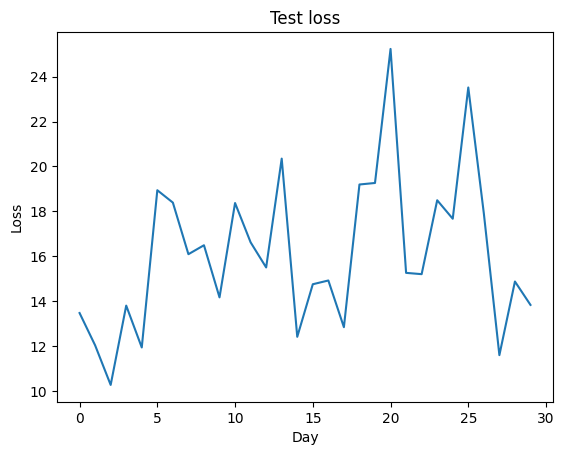

In [8]:
# Calculate the MSE for each prediction
test_losses = [mean_squared_error(y_true, y_pred)
               for y_true, y_pred in zip(actuals, predictions)]

# Plot the test losses
plt.plot(test_losses)
plt.title('Test loss')
plt.ylabel('Loss')
plt.xlabel('Day')
plt.show()